# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы четвертой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [1]:
import os

practice_dir_path = '/Users/davidlimcher/Desktop/Python/TimeSeriesCourse/practice/04 Matrix profile'
os.chdir(practice_dir_path)

Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [2]:
%load_ext autoreload
%autoreload 2

Импортируйте библиотеки и модули, необходимые для реализации практической работы 4.

In [3]:
#!pip install stumpy

In [4]:
import pandas as pd
import numpy as np
import os
import datetime
from sklearn.metrics import accuracy_score

from modules.plots import *
from modules.mp import compute_mp
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords
from modules.meter_swapping_detection import *

## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [5]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

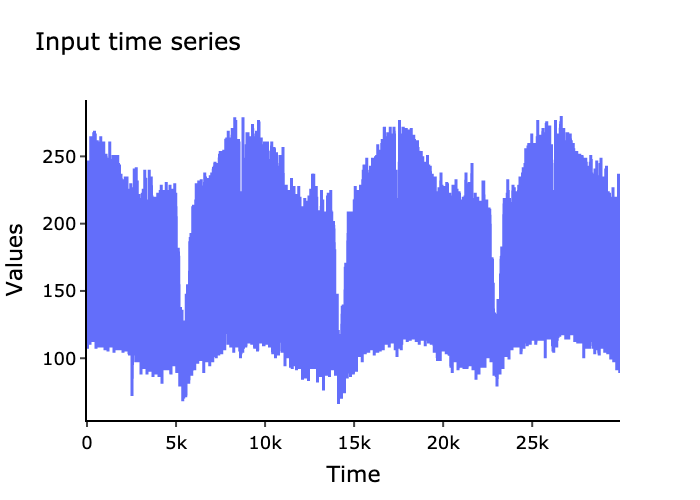

In [6]:
plot_ts(ts, "Input time series")

Анализ временных рядов на основе матричного профиля осуществляет библиотека [stumpy](https://stumpy.readthedocs.io/en/latest/index.html). Напишите функцию `compute_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [7]:
m = 165
excl_zone = int(np.ceil(m / 2))
mp = {}

mp = compute_mp(ts, m, excl_zone)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Визуализируйте найденный матричный профиль ряда.

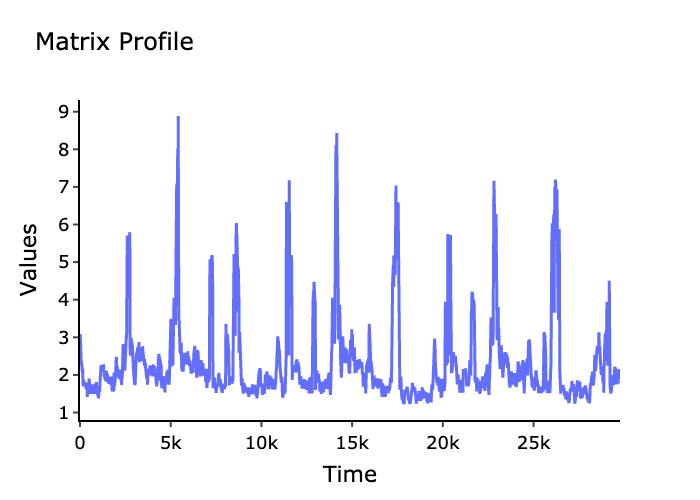

In [8]:
plot_ts(mp['mp'], "Matrix Profile")

### **Задача 2.**
Выполните поиск top-$k$ мотивов в исходном временном ряде на основе построенного матричного профиля. Для этого реализуйте самостоятельно функцию `top_k_motifs()` в модуле *motifs.py*. Среди найденных мотивов не должно быть тривиальных совпадений, поэтому в `top_k_motifs()` добавьте вызов функции `apply_exclusion_zone()` из модуля *utils.py*.

In [9]:
top_k = 6
motifs = {}

top_k_idxs = stumpy.motifs(ts, mp['mp'], max_matches=top_k)[1][0]

motifs['indices'] = [sorted([top_k_idxs[i], top_k_idxs[i+1]]) for i in range(0, len(top_k_idxs)-1, 2)]

Выполните визуализацию найденных top-$k$ мотивов с помощью функции `plot_motifs()` из *plots.py*.

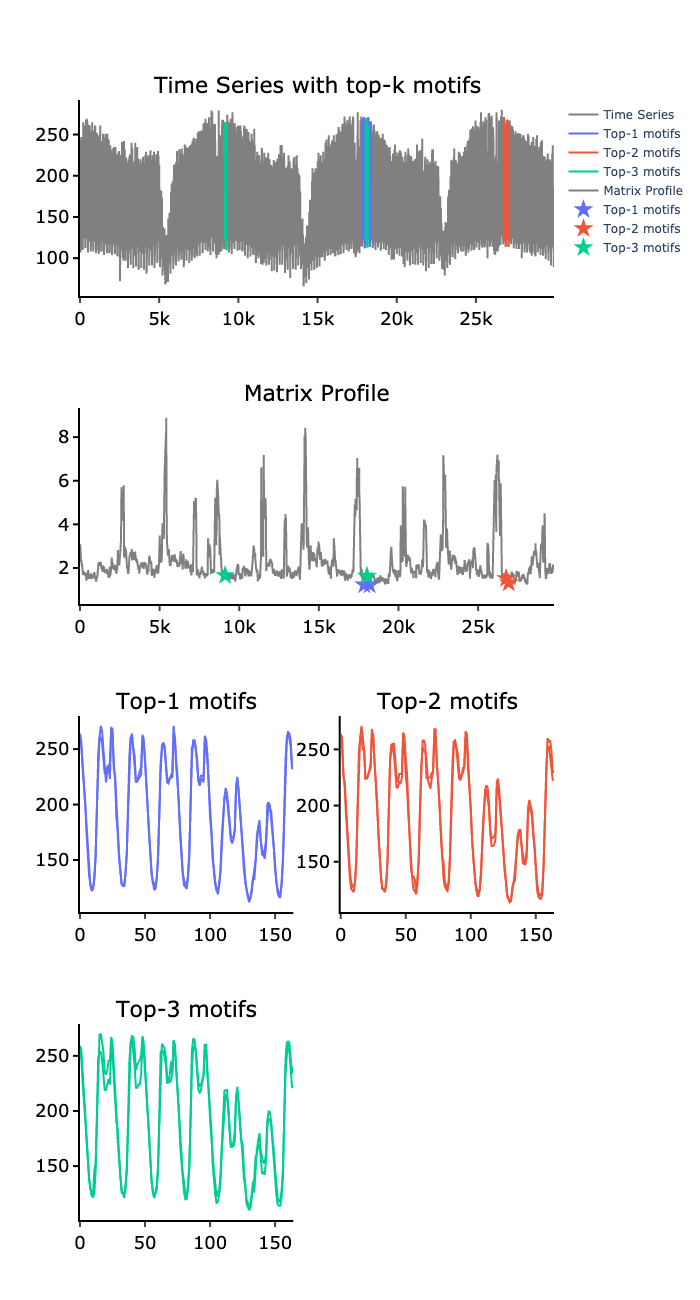

In [10]:
plot_motifs(mp, motifs)

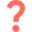
Проанализируйте и изложите содержательный смысл полученных результатов.

Анализ временного ряда потребления электроэнергии выявил регулярные сезонные колебания, которые указывают на циклические пики и спады спроса, вероятно, связанные с потребностями в отоплении или охлаждении в разное время года. Матрикс-профиль выделяет повторяющиеся аномалии, которые могут указывать на особые события или нестандартные дни потребления. Определение характерных мотивов позволяет прогнозировать будущий спрос и эффективно планировать ресурсы, особенно во время пиковых нагрузок, что может быть полезным для оптимизации энергоснабжения и предотвращения перегрузок.

### **Задача 3.**
Реализуйте самостоятельно функцию `top_k_discords()` в модуле *discords.py*, предназначенную для поиска top-$k$ диссонансов во временном ряде на основе матричного профиля. Чтобы исключить попадание тривиальных совпадений в результирующее множество диссонансов воспользуйтесь функцией `apply_exclusion_zone()` из модуля *utils.py*.

Загрузите временной ряд *nyc_taxi.csv* из директории *./datasets/part1/*, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

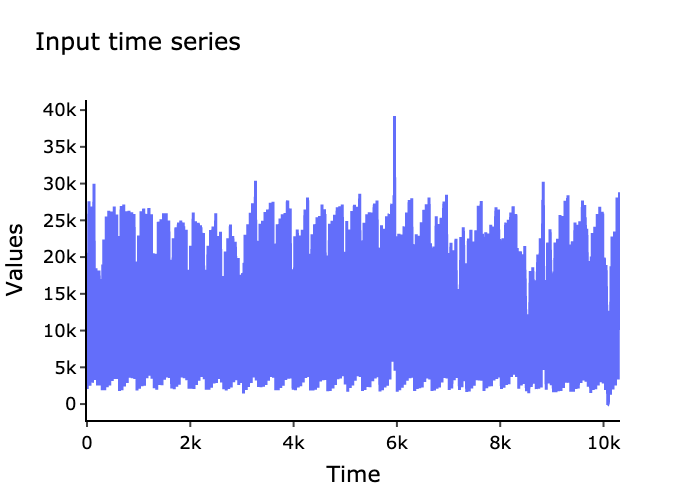

In [11]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()
plot_ts(ts, "Input time series")

In [12]:
m = 96
excl_zone = int(np.ceil(m / 2))
mp = {}

mp = compute_mp(ts.astype(np.float64), m, excl_zone)

np.argsort(mp['mp'])


array([2636, 2300, 2662, ..., 8783, 8785, 8784])

In [13]:
top_k = 15
discords = {}

top_k_idxs = []
argsort_mp = np.argsort(mp['mp'])
for i in range(1, len(argsort_mp)+1):
    idx = argsort_mp[-i]
    flag = True
    for top_k_idx in top_k_idxs:
        if abs(top_k_idx - idx) < excl_zone:
            flag = False
    if flag:
        top_k_idxs.append(idx)
    if len(top_k_idxs) == top_k:
        break

print(top_k_idxs)

discords['indices'] = top_k_idxs

[8784, 9986, 10049, 10097, 8837, 5868, 105, 9651, 8449, 5954, 7107, 154, 8396, 8640, 2930]


Выполните визуализацию найденных top-$k$ диссонансов.

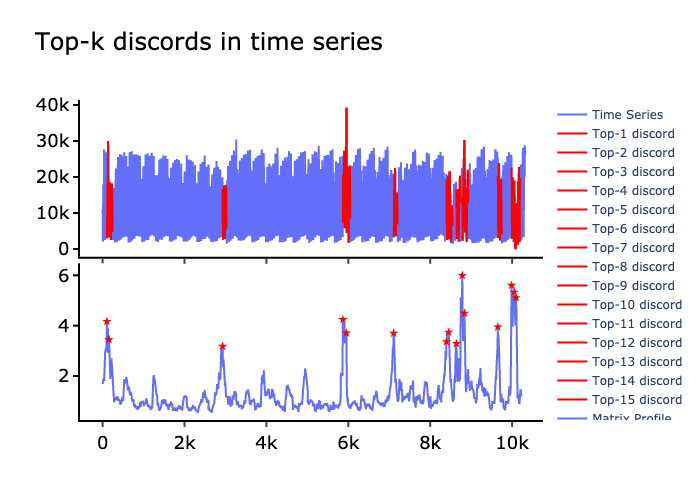

In [14]:
plot_discords(mp, discords)

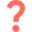
Проанализируйте и изложите содержательный смысл полученных результатов.

Анализ представленного временного ряда потребления электроэнергии и выявленных диссонансов позволяет сделать выводы о наличии аномальных всплесков потребления, которые выделяются на общем фоне. На первом графике видно, что основной тренд потребления стабилен с умеренными колебаниями, но периодически наблюдаются резкие пики, что может свидетельствовать об аномальных событиях, таких как сбои в сети или внезапные всплески потребности. Матрикс-профиль и выделенные диссонансы на втором графике указывают на места, где временной ряд наибольшим образом отличается от общих шаблонов, что помогает выявить редкие и нестандартные отклонения в потреблении. Эти аномалии можно использовать для мониторинга и прогнозирования неожиданных нагрузок на сеть, а также для принятия оперативных мер по стабилизации энергоснабжения.

## **Часть 2.** Сегментация повторяющихся активностей.

### **Задача 4.**

Загрузите временной ряд PAMAP *pamap.csv* из директории *./datasets/part2/*, представляющий собой показания закрепленного на человеке виброакселерометра. Данный ряд включает показания, снятые при выполнении человеком трех видов физической активности: ходьба, подъем по лестнице и спуск по лестнице. Необходимо сегментировать временной ряд на основе его матричного профиля для определения того, когда человек шел и когда поднимался/спускался. Поскольку подъем и спуск по лестнице – это схожие действия, поэтому будем считать, что это одна активность.  

In [15]:
ts_url = './datasets/part2/pamap.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд PAMAP.

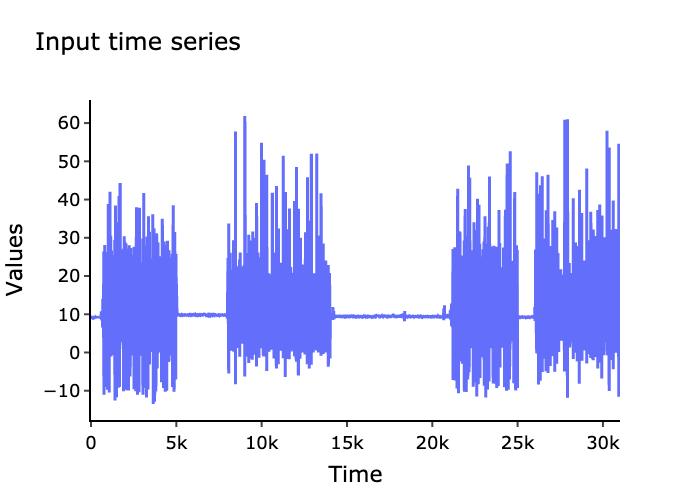

In [16]:
plot_ts(ts, "Input time series")

Найдите и визуализируйте матричный профиль временного ряда.

In [17]:
m = 100
excl_zone = m
mp = {}

mp = compute_mp(ts, m, excl_zone)

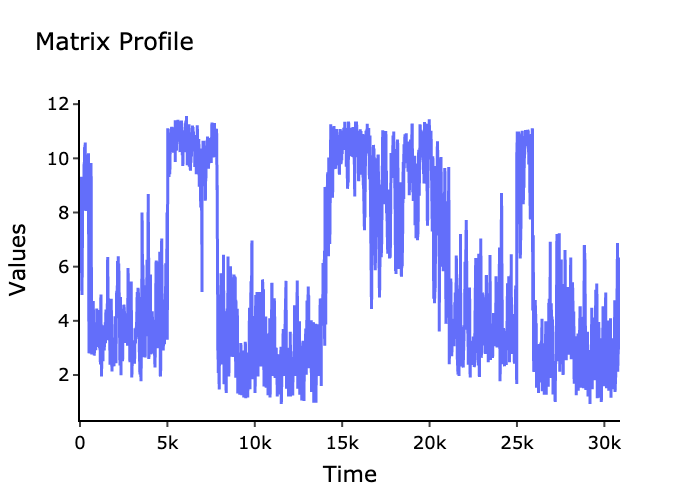

In [18]:
plot_ts(mp['mp'], "Matrix Profile")

Вычислите порог по формуле, которая представлена в презентации [04 Matrix profile.pdf](https://github.com/mzym/TimeSeriesCourse/blob/main/slides/04%20Matrix%20profile.pdf).

In [19]:
threshold = 0

a=0.6
threshold = a * (np.min(mp['mp']) + np.max(mp['mp'][np.where(mp['mp'] != float('inf'))]))
threshold

7.495433056693457

Выполните визуализацию результатов сегментации повторяющихся активностей.

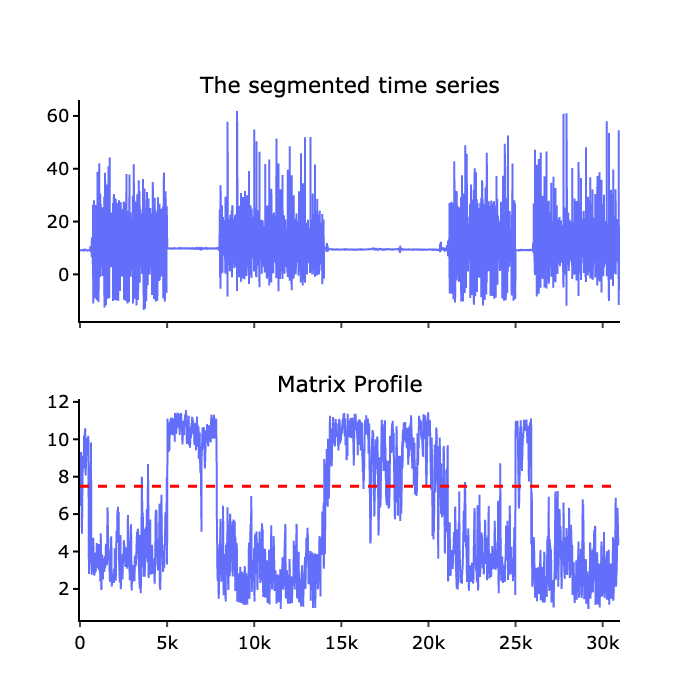

In [20]:
plot_segmentation(mp, threshold)

Загрузите истинную разметку временного ряда PAMAP *pamap_labels.csv*, где 0 означает ходьбу, 1 – подъем по лестнице, 2 – спуск с лестницы. Вычислите точность по метрике accuracy, сравнив полученные результаты по основе матричного профиля с истинной разметкой.

In [21]:
labels_url = './datasets/part2/pamap_labels.csv'

labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

In [22]:
labels = np.where(labels==2, 1, labels)
labels = labels[m:]
labels = labels[sorted(mp['mpi'].astype(int))]


labels_pred = (mp['mp'] < threshold).astype(int)
accuracy_score(labels, labels_pred)

0.842892283790782

## **Чaсть 3.** Casy Study: Раскрытие краж электричества подменой счетчиков (meter-swapping detection).


### **Задача 5.**

Рассмотрим практическое применение использования матричного профиля для решения задачи, связанной с раскрытием краж электричества путем подмены счетчиков.

Загрузите временные ряды из директории *./datasets/part3/*, которые были выбраны случайным образом из набора данных (House 1, 2, 3, 4 и 11), содержащего данные потребления электроэнергии 20 жилых домов в Великобритании с 1 января по 23 декабря 2014 года.

In [23]:
# Загрузка данных
path = './datasets/part3/'

house_idx = [1, 2, 3, 4, 11]

filenames = [f"House{i}.csv" for i in house_idx]

consumptions = {}
for house in filenames:
    consumptions[house[:-4]] = pd.read_csv(os.path.join(path, house), header=None, index_col=0)
    consumptions[house[:-4]].index = pd.to_datetime(consumptions[house[:-4]].index, format="%Y-%m-%d %H:%M:%S")

# Очистка данных от NaN после загрузки
for house, df in consumptions.items():
    # Интерполяция для заполнения NaN
    df_cleaned = df.interpolate(method='linear')
    # Удаление оставшихся NaN
    df_cleaned = df_cleaned.dropna()
    consumptions[house] = df_cleaned


Далее смоделируем событие замены счетчика. Для этого каждый временной ряд разделим на две части: "Head" (до 1 октября) и "Tail" (после 1 октября). После чего выберем случайным образом 2 временных ряда (например, House1 и House11) и поменяем местами их "Tail" части.

In [28]:
# Разделение на 'heads' и 'tails'
cutoff = pd.to_datetime('2014-10-01')
heads, tails = heads_tails(consumptions, cutoff, house_idx)

# Обмен 'Heads' и 'Tails' домов 1 и 11
swap1, swap2 = 1, 11
consumptions[f'House{swap1}'] = pd.concat([heads[f'H_{swap1}'], tails[f'T_{swap2}']])
consumptions[f'House{swap2}'] = pd.concat([heads[f'H_{swap2}'], tails[f'T_{swap1}']])
heads, tails = heads_tails(consumptions, cutoff, house_idx)


Визуализируйте исходные временные ряды и параллельную оси OY прямую, которая делит временные ряды на "Head" и "Tail" части.

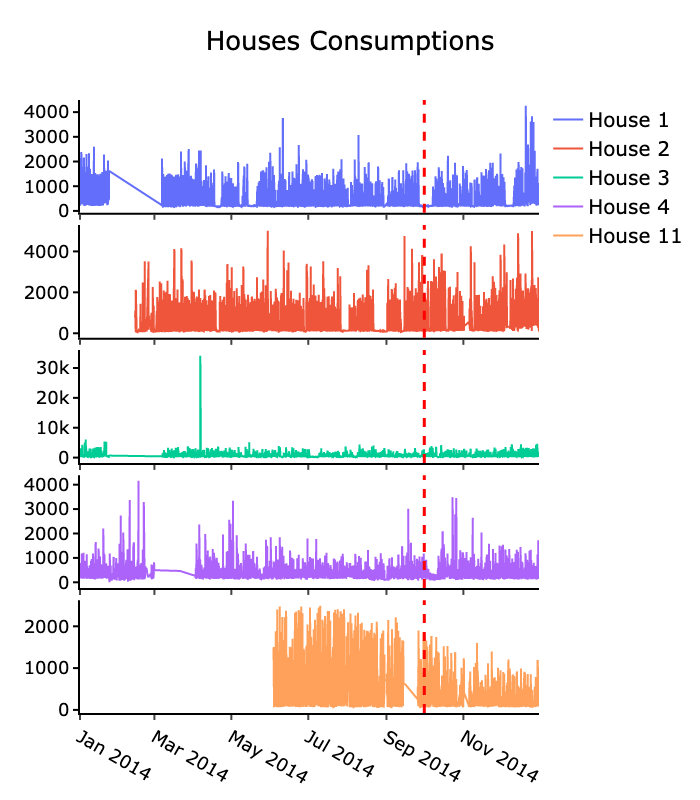

In [29]:
plot_consumptions_ts(consumptions, cutoff, house_idx)

Чтобы найти переставленную пару временных рядов, выполним следующее. Сначала составим временные ряды $H_i$ из всевозможных комбинаций "Head" и "Tail" частей исходных временных рядов $T_K$, где $1 \leq i \leq |T|^2$, $1 \leq K \leq |T|$. В нашем случае, $|T| = 5$.  Далее среди них найдем такую пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$. Минимальная оценка $swap\_score$ для пары рядов $(H_i, H_j)$ вычисляется следующим образом:

\begin{equation}
swap\_score(i,j) = \frac{\min{(Head_{H_i} \bowtie Tail_{H_j})}}{\min{(Head_{H_i} \bowtie Tail_{H_i})}+eps},
\end{equation}

где $\bowtie$ – операция нахождения матричного профиля между двумя временными рядами. Матричный профиль между двумя временными рядами содержит расстояния между всеми подпоследовательностями первого временного ряда и их ближайшими соседями, которые являются подпоследовательностями второго временного ряда.

Добавьте в функцию `compute_mp()` в модуле *mp.py* поддежку вычисления матричного профиля между двумя различными временными рядами и найдите пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$ среди всех пар.

In [26]:
m = 24 * 4

min_score = meter_swapping_detection(heads, tails, house_idx, m)

Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB-join.
Try setting `ignore_trivial = False`.
Arrays T_A, T_B are not equal, which implies an AB

In [27]:
min_i, min_j, mp_j = min_score['i'], min_score['j'], min_score['mp_j']
print(f'Временные ряды с минимальной оценкой: (H_{min_i}, T_{min_j}).')

Временные ряды с минимальной оценкой: (H_3, T_1).


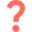
Проанализируйте и изложите содержательный смысл полученных результатов.

### **Результаты и анализ**

   Согласно вычислениям, пара временных рядов с минимальной оценкой `swap_score` оказалась **(H_3, T_1)**, что указывает на то, что Head часть временного ряда дома **House3** и Tail часть временного ряда дома **House1** имеют наибольшее сходство в сравнении с другими комбинациями. Это может указывать на замену данных (моделируемую подмену счетчика), которая была проведена для **House1 и House11**.

   **Содержательный смысл результата**:
   
   - Минимальное значение `swap_score` для пары (H_3, T_1) предполагает, что именно здесь обнаружено сильное несоответствие, вызванное подменой данных.
   - Это подтверждает эффективность применения матричного профиля для обнаружения аномалий, таких как замена данных от одного источника данными от другого. В реальных условиях такой подход может быть использован для обнаружения подозрительных изменений в данных потребления, вызванных вмешательством или мошенничеством (например, подмена или манипуляция с показаниями счетчиков).

Таким образом, **метод матричного профиля** показал свою применимость в выявлении несоответствий в данных потребления электроэнергии, что может служить ценным инструментом для обнаружения потенциальных случаев кражи электроэнергии или иных форм манипуляций с показаниями.